# Task 1

Homa Priya Tarigopula, Mouhammad Abu Rasheed and Frederik Rogge

Create dataset using Franke function

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
%matplotlib inline

from utils import *

# Create data
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x, y)

# Compute z
z = FrankeFunction(x, y)

# Create features as pairs of (x, y)
features = np.stack([x.ravel(), y.ravel()], axis=1)

# Get labels
labels = z.ravel()

Plot Franke function

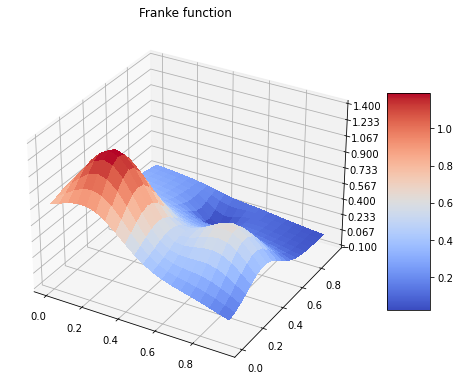

In [2]:
def plot_function(x, y, z, title=None):
    # Plot function
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the surface.
    surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

    ax.set_zlim(-0.10, 1.40)
    ax.zaxis.set_major_locator(LinearLocator(10))

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)
    if title is not None:
        plt.title(title)
    
    plt.show()
    
plot_function(x, y, z, 'Franke function')

### Ordinary least squares

Train regression model and plot predictions.

In [22]:
def perform_ols(features, labels, degree, scaling=None, add_noise=False, mean=0, std=0.1):
    
    if scaling == 'z-score':
        features = z_score(features)
    elif scaling == 'norm':
        features = normalize(features)
    
    # Split dataset into train and test set
    x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=20)
    
    if add_noise:
        y_train_noise = y_train + np.random.normal(mean, std, y_train.shape)
    else:
        y_train_noise = y_train
    
    # Get degrees as list
    if not isinstance(degree, (tuple, list)):
        degree = [degree]

    rs = []
    errors = []
    predictions = []
    for d in degree:

        # Get polynomial features, that is (x, y, xy, x^2, y^2, xy^2 x^2y, ..)
        poly = PolynomialFeatures(d)
        x_train_poly = poly.fit_transform(x_train)
        x_test_poly = poly.transform(x_test)

        # Determine optimal parameters
        beta = np.linalg.pinv(x_train_poly.T @ x_train_poly) @ x_train_poly.T @ y_train_noise

        # Plot estimated function
        features_poly = poly.transform(features)  
        labels_hat = features_poly @ beta

        # Plot estimated function
        predictions.append(labels_hat.reshape(x.shape))

        # Get predictions for x_train and x_test samples
        y_hat_train = x_train_poly @ beta
        y_hat_test = x_test_poly @ beta

        # Determine metrics
        r2_train = R2(y_train, y_hat_train)
        r2_test = R2(y_test, y_hat_test)
        mse_train = MSE(y_train, y_hat_train)
        mse_test = MSE(y_test, y_hat_test)

        # Append to lists
        rs.append([r2_train, r2_test])
        errors.append([mse_train, mse_test])

    return rs, errors, predictions


#### Analysis w/o any scaling and w/o noise

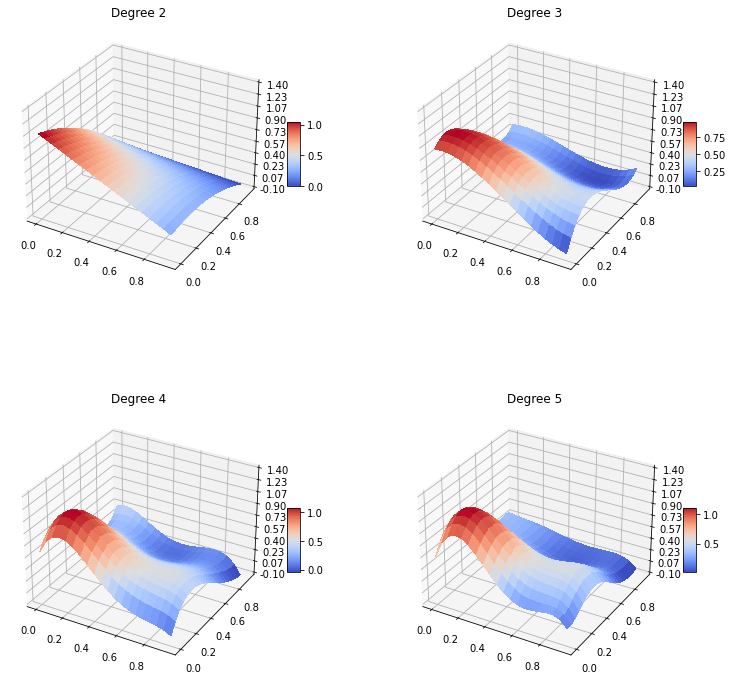

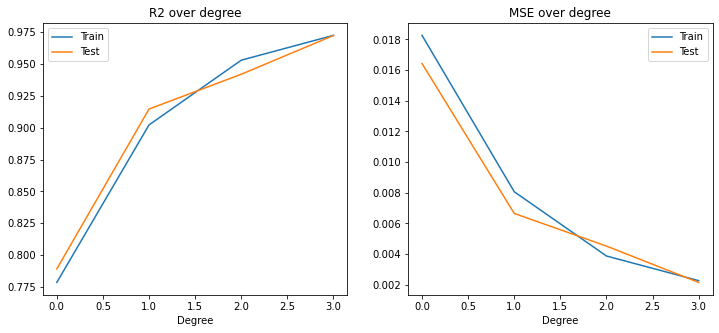

In [23]:
# Specify degree of polynomial to be fitted
degree = [2, 3, 4, 5]

# Perform OLS
rs, errors, predictions = perform_ols(features, labels, degree)
        
# Plot predictions
fig = plt.figure(figsize=(13, 13))
n = len(degree)
rows = np.ceil(n/2).astype(int)
for i in range(n):
    ax = fig.add_subplot(rows, 2, i+1, projection='3d')
    surf = ax.plot_surface(x, y, predictions[i], cmap=cm.coolwarm, linewidth=0, antialiased=False)
    ax.set_zlim(-0.10, 1.40)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    plt.title('Degree ' + str(degree[i]))
    fig.colorbar(surf, shrink=0.2, aspect=5)
plt.show()

# Now, plot results to analyze
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(rs)
ax.set_xlabel('Degree')
ax.legend(['Train', 'Test'])
plt.title('R2 over degree')
ax = fig.add_subplot(1, 2, 2)
ax.plot(errors)
ax.set_xlabel('Degree')
ax.legend(['Train', 'Test'])
plt.title('MSE over degree')
plt.show()

#### Analysis with z-scaling and w/o noise

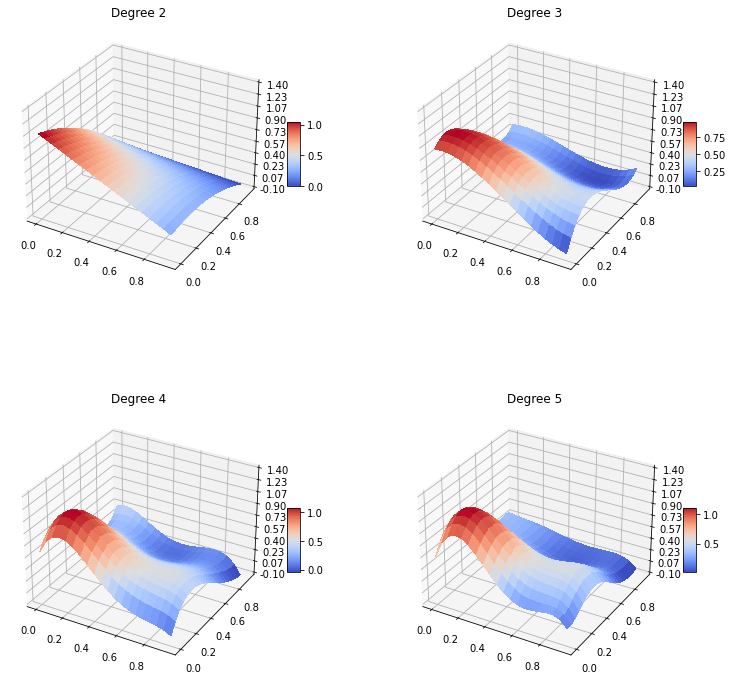

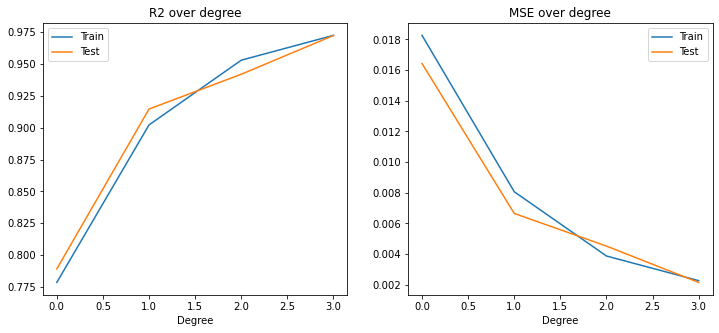

In [20]:
# Specify degree of polynomial to be fitted
degree = [2, 3, 4, 5]

# Perform OLS
rs, errors, predictions = perform_ols(features, labels, degree, scaling='z-score')
        
# Plot predictions
fig = plt.figure(figsize=(13, 13))
n = len(degree)
rows = np.ceil(n/2).astype(int)
for i in range(n):
    ax = fig.add_subplot(rows, 2, i+1, projection='3d')
    surf = ax.plot_surface(x, y, predictions[i], cmap=cm.coolwarm, linewidth=0, antialiased=False)
    ax.set_zlim(-0.10, 1.40)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    plt.title('Degree ' + str(degree[i]))
    fig.colorbar(surf, shrink=0.2, aspect=5)
plt.show()

# Now, plot results to analyze
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(rs)
ax.set_xlabel('Degree')
ax.legend(['Train', 'Test'])
plt.title('R2 over degree')
ax = fig.add_subplot(1, 2, 2)
ax.plot(errors)
ax.set_xlabel('Degree')
ax.legend(['Train', 'Test'])
plt.title('MSE over degree')
plt.show()

#### Analysis with z-scaling and with added noise

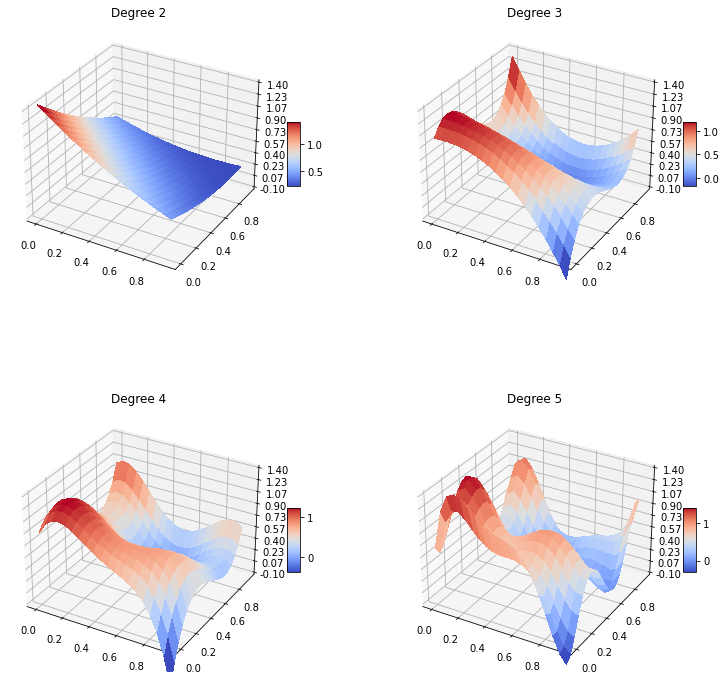

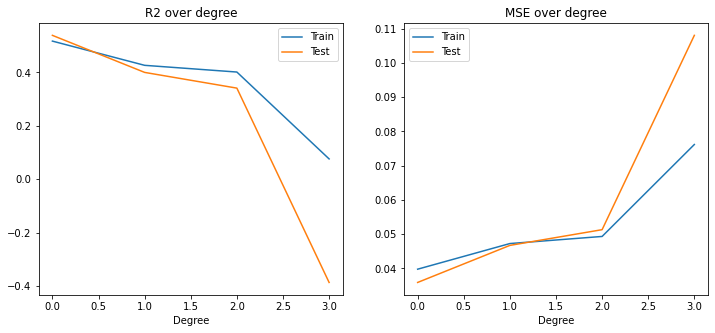

In [25]:
# Specify degree of polynomial to be fitted
degree = [2, 3, 4, 5]

# Perform OLS
rs, errors, predictions = perform_ols(features, labels, degree, scaling='z-score', add_noise=True, mean=0, std=1)
        
# Plot predictions
fig = plt.figure(figsize=(13, 13))
n = len(degree)
rows = np.ceil(n/2).astype(int)
for i in range(n):
    ax = fig.add_subplot(rows, 2, i+1, projection='3d')
    surf = ax.plot_surface(x, y, predictions[i], cmap=cm.coolwarm, linewidth=0, antialiased=False)
    ax.set_zlim(-0.10, 1.40)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    plt.title('Degree ' + str(degree[i]))
    fig.colorbar(surf, shrink=0.2, aspect=5)
plt.show()

# Now, plot results to analyze
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(rs)
ax.set_xlabel('Degree')
ax.legend(['Train', 'Test'])
plt.title('R2 over degree')
ax = fig.add_subplot(1, 2, 2)
ax.plot(errors)
ax.set_xlabel('Degree')
ax.legend(['Train', 'Test'])
plt.title('MSE over degree')
plt.show()